In [12]:
# This code generates the universal cam curve from cam parameters.

In [8]:
# import modules
%matplotlib inline
from math import sin,cos,pi
import numpy as np
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt

In [9]:
#---- input cam parameters ----
li_T_pm=[0,0.125,0.1250,0.5,0.5,0.875,0.875,1] # Dimensionless time parameter T0 T1 T2 T3 T4 T5 T6 T7
#li_T_pm=[0,0.125,0.375,0.45,0.55,0.625,0.875,1]
li_S_pm=[200,100]                                 # Dimensionless speed parameter S0 S7
li_V_pm=[0,0]                                 # Dimensionless speed parameter V0 V7

m=1                                           # m=Amp/Amm : positive/negative acceralation ratio

div=100                          # the number of time step

In [10]:
# internal calc parameter
T0=li_T_pm[0]
T1=li_T_pm[1]
T2=li_T_pm[2]
T3=li_T_pm[3]
T4=li_T_pm[4]
T5=li_T_pm[5]
T6=li_T_pm[6]
T7=li_T_pm[7]

S0=li_S_pm[0]
S7=li_S_pm[1]

V0=li_V_pm[0]
V7=li_V_pm[1]

In [11]:
# calc C parameter
C1=2*(T1-T0)/pi
C2=(T2-T1)
C3=2*(T3-T2)/pi
C4=T4-T3
C5=2*(T5-T4)/pi
C6=T6-T5
C7=2*(T7-T6)/pi

# Amp : Maximun of positive acceralation 
Amp=(S7-S0-V0*(T7-T0))/(-m*(C7**2+0.5*C6**2-C5**2+C6*(T7-T6)+C5*(T7-T4))+C3**2+0.5*C2**2-C1**2+C3*(T7-T3)+C2*(T7-T2)+C1*(T7-T0))

# Amm : Maximun of negative acceralation 
Amm=Amp/m  

# calc node V 
V1=C1*Amp+V0
V2=C2*Amp+V1
V3=C3*Amp+V2
V4=V3
V5=-C5*Amm+V4
V6=-Amm*C6+V5
V7=-C7*Amm+V6

# calc node S 
S1=-C1**2*Amp+V1*(T1-T0)+S0
S2=Amp/2*C2**2+V1*C2+S1
S3=C3**2*Amp+V2*(T3-T2)+S2
S4=V3*C4+S3
S5=C5**2*Amm+V5*(T5-T4)+S4
S6=-Amm/2*C6**2+V5*C6+S5
S7=-C7**2*Amm+V6*(T7-T6)+S6

In [12]:
#---- difine 8 section of univ_cam----
def sect_0(T):# T<T0
    J=0
    A=0
    V=0
    S=0
    return [0,T,S,V,A,J]

def sect_1(T):# T0<=T<T1
    p=(T-T0)/C1
    J=Amp/C1*cos(p)
    A=Amp*sin(p)
    V=C1*Amp*(1-cos(p))+V0
    S=-C1**2*Amp*sin(p)+V1*(T-T0)+S0  
    return [1,T,S,V,A,J]

def sect_2(T):# T1<=T<T2
    p=T-T1
    J=0
    A=Amp
    V=Amp*p+V1
    S=Amp/2*p**2+V1*p+S1
    return [2,T,S,V,A,J]

def sect_3(T):# T2<=T<T3
    p=(T-T2)/C3
    J=-Amp/C3*sin(p)
    A=Amp*cos(p)
    V=C3*Amp*sin(p)+V2
    S=-C3**2*Amp*(cos(p)-1)+V2*(T-T2)+S2
    return [3,T,S,V,A,J]

def sect_4(T):# T3<=T<T4    
    J=0
    A=0
    V=V3
    S=V3*(T-T3)+S3
    return [4,T,S,V,A,J]

def sect_5(T):# T4<=T<T5
    p=(T-T4)/C5
    J=-Amm/C5*cos(p)
    A=-Amm*sin(p)
    V=C5*Amm*(cos(p)-1)+V4
    S=C5**2*Amm*sin(p)+V5*(T-T4)+S4
    return [5,T,S,V,A,J]

def sect_6(T):# T5<=T<T6
    p=T-T5
    J=0
    A=-Amm
    V=-Amm*p+V5
    S=-Amm/2*p**2+V5*p+S5
    return [6,T,S,V,A,J]

def sect_7(T):# T6<=T<T7
    p=(T-T6)/C7
    J=Amm/C7*sin(p)
    A=-Amm*cos(p)
    V=-C7*Amm*sin(p)+V6
    S=C7**2*Amm*(cos(p)-1)+V6*(T-T6)+S6
    return [7,T,S,V,A,J]

def sect_8(T):# T7<=T    
    J=0
    A=0
    V=V7
    S=S7+V7*(T-T7)
    return [8,T,S,V,A,J]

In [13]:
#---- 繰り返し演算 ----
T=0                                     #initial value
J=0
A=0
V=0
S=0

ary_dimless=np.array([0,0,0,0,0,0])     #initial value
mat_dimless=np.array([0,0,0,0,0,0])     #initial value

T_step=(T7-T0)/div                      # time step
print("time step:{},divid number:{}".format(T_step,div))

for div_cnt in range(div+1):    #range()   heve to get (div+1) into range
    if T<T0:
        ary_dimless=np.array([sect_0(T)])
        
    elif T0<=T<T1:
        ary_dimless=np.array([sect_1(T)])
        
    elif T1<=T<T2:
        ary_dimless=np.array([sect_2(T)])
           
    elif T2<=T<T3:
        ary_dimless=np.array([sect_3(T)])
        
    elif T3<=T<T4:
        ary_dimless=np.array([sect_4(T)])
              
    elif T4<=T<T5:
        ary_dimless=np.array([sect_5(T)])
                
    elif T5<=T<T6:
        ary_dimless=np.array([sect_6(T)])
                
    elif T6<=T<=T7:                          # When T=1 , sect_1(T) is applied .
        ary_dimless=np.array([sect_7(T)])

        
    elif T7<T:                               # non use , because J=0 is defined .
        ary_dimless=np.array([sect_8(T)])
                
    else:
        print("Done")
 
    mat_dimless=np.vstack([mat_dimless,ary_dimless]) # add current time 
    T+=T_step        # next time ste}p

#---- 繰り返し演算 END ----

mat_dimless=np.delete(mat_dimless, obj=0, axis=0) #　初期値の行を削除する

df=pd.DataFrame(mat_dimless) # comvert into pandas　data frame
df.columns=("section","T","S","V","A","J")
pd.options.display.float_format = '{:.6f}'.format
#pd.options.display.precision = 6# significant figures
omega = 2 * np.pi * 10 / 60
cjd=0
delta01=50
chushit=cjd/omega
msj=delta01/omega
jgsj=msj-chushit
df['TT']=df['T']*jgsj+chushit
df['jd']=df['TT']*omega
print(max(df['jd']))
delta_1=df['jd'].to_numpy()
S1=df['S'].to_numpy()
V1=df['V'].to_numpy()
A1=df['A'].to_numpy()
J1=df['J'].to_numpy()
print(delta_1)

time step:0.01,divid number:100
50.00000000000003
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50. ]


<Figure size 640x480 with 0 Axes>

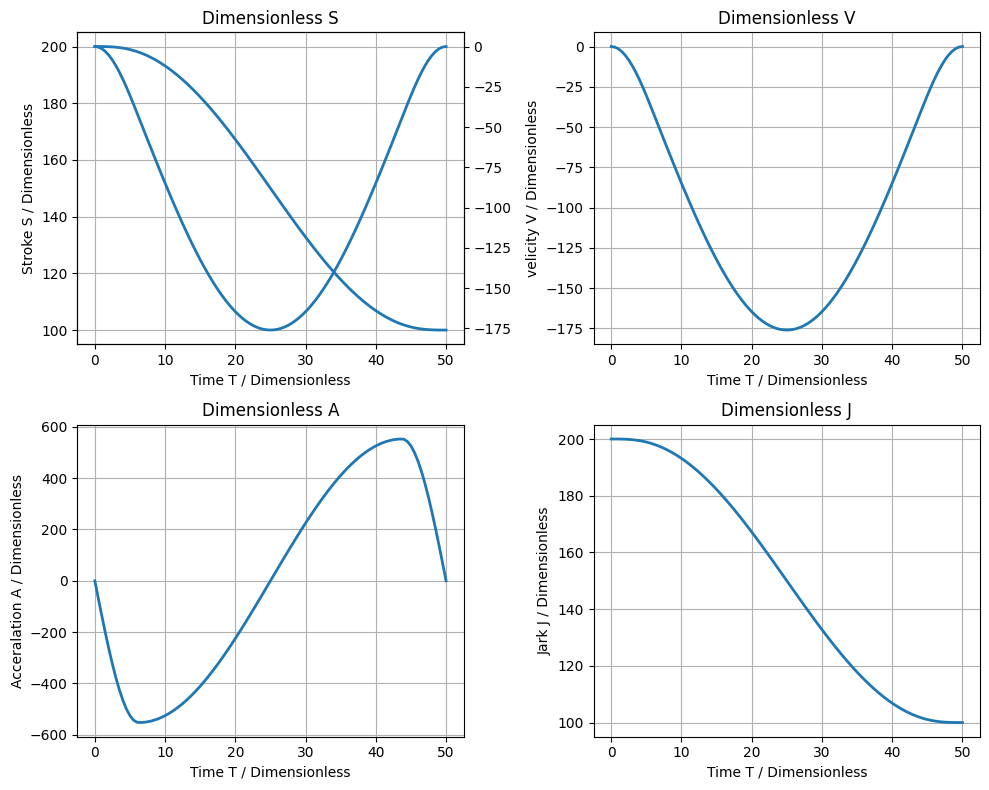

In [14]:
# visualization
plt.figure() # initializ plot
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

axes[0,0].plot(df["jd"], df["S"], linewidth=2)
axes[0,0].set_title('Dimensionless S')
axes[0,0].set_xlabel('Time T / Dimensionless')
axes[0,0].set_ylabel('Stroke S / Dimensionless')
#axes[0,0].set_xlim(0,1)
axes[0,0].grid(True)
axes[0,0]=axes[0,0].twinx() #associated with 2 data on x.
axes[0,0].plot(df["jd"], df["V"], linewidth=2)

axes[0,1].plot(df["jd"], df["V"], linewidth=2)
axes[0,1].set_title('Dimensionless V')
axes[0,1].set_xlabel('Time T / Dimensionless')
axes[0,1].set_ylabel('velicity V / Dimensionless')
#axes[0,1].set_xlim(0,1)
axes[0,1].grid(True)

axes[1,0].plot(df["jd"], df["A"], linewidth=2)
axes[1,0].set_title('Dimensionless A')
axes[1,0].set_xlabel('Time T / Dimensionless')
axes[1,0].set_ylabel('Acceralation A / Dimensionless')
#axes[1,0].set_xlim(0,1)
axes[1,0].grid(True)

axes[1,1].plot(df["jd"], df["S"], linewidth=2)
axes[1,1].set_title('Dimensionless J')
axes[1,1].set_xlabel('Time T / Dimensionless')
axes[1,1].set_ylabel('Jark J / Dimensionless')
#axes[1,1].set_xlim(0,1)
axes[1,1].grid(True)

plt.tight_layout() # " plt.tight_layout() " must be here 
# axes[1,1].axis('off')
plt.show()

In [42]:
#曲線記号	曲線名称	T1	T2	T3	T4	T5	T6
#11	等加速度	0	0.5	0.5	0.5	0.5	1
#12	単弦	0	0	0.5	0.5	1	1
#22	サイクロイド	0.25	0.25	0.5	0.5	0.75	0.75
#25	変形台形	0.125	0.375	0.5	0.5	0.625	0.875
#26	変形正弦	0.125	0.125	0.5	0.5	0.875	0.875
#27	変形等速度	0.0625	0.0625	0.25	0.75	0.9375	0.9375
#33	非対称サイクロイド	0.2	0.2	0.4	0.4	0.7	0.7
#34	非対称変形台形	0.1	0.3	0.4	0.4	0.55	0.85
#35	トラベクロイド	0.125	A（※1）	A+0.125	A+0.125	A+0.25	A+0.25
#43	片停留サイクロイドm=1	0.25	0.25	0.5	0.5	1	1
#44	片停留サイクロイドm=2/3	0.2	0.2	0.4	0.4	1	1
#45	片停留変形台形m=1	0.125	B（※2）	B+0.125	B+0.125	B+0.25	1
#46	片停留変形台形ファーガソン	0.125	0.375	0.5	0.5	0.675	1
#47	片停留変形台形m=2/3	0.125	C（※3）	C+0.125	C+0.125	C+5/24	1
#48	片停留変形正弦	0.125	0.125	0.5	0.5	1	1
#49	片停留トラベクロイド	0.125	D（※4）	D+0.125	D+0.125	1	1
#51	無停留変形台形	0	0.25	0.5	0.5	0.75	1
#52	無停留変形等速度	0	0	0.25	0.75	1	1
#92	NC2	0	0.25	1/3	1/3	5/6	5/6

In [43]:
df.to_excel('D:\/pandas_to_excel.xlsx', sheet_name='new_sheet_name') # generate the export file on xlsx

[<matplotlib.lines.Line2D object at 0x000001943E9141C0>] ['$Stroke$']


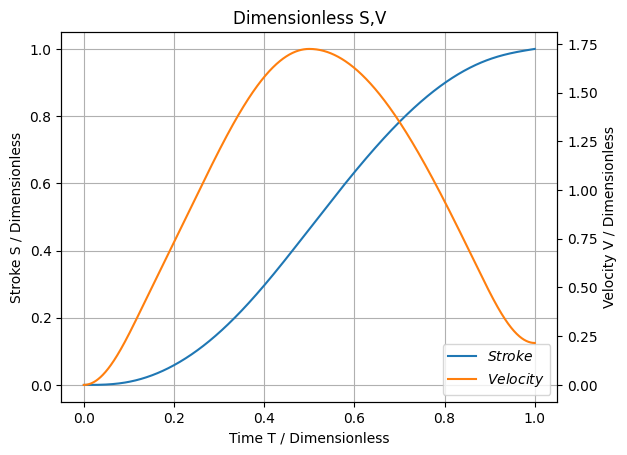

In [44]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
t =df["T"]
y1 =df["S"]
ln1=ax1.plot(t, y1,'C0',label=r'$Stroke$')


ax2 = ax1.twinx()
y2 =df["V"]
ln2=ax2.plot(t,y2,'C1',label=r'$Velocity$')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')

plt.title("Dimensionless S,V")
ax1.set_xlabel('Time T / Dimensionless')
ax1.set_ylabel('Stroke S / Dimensionless')
ax2.set_ylabel('Velocity V / Dimensionless')
ax1.grid(True)

print(h1, l1)